In [1]:
import pyiast
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')

In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/cokes/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

# pyIAST example (N$_2$, CO$_2$, H$_2$O)
data from Mason et al. [here](https://pubs.acs.org/doi/abs/10.1021/jacs.5b00838)

## construct models for pure-component adsorption isotherms

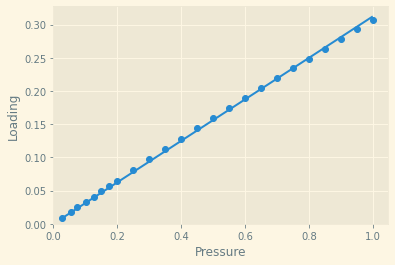

Henry identified model parameters:
	KH = 0.312273
('RMSE = ', 0.002452163614086332)


In [2]:
df_N2 = pd.read_csv("N2.csv", skiprows=1)
N2_isotherm = pyiast.ModelIsotherm(df_N2, loading_key="Loading(mmol/g)", 
                                         pressure_key="P(bar)", model='Henry')
pyiast.plot_isotherm(N2_isotherm)
N2_isotherm.print_params()

Langmuir identified model parameters:
	M = 9.308527
	K = 0.244924
('RMSE = ', 0.00693485221049325)


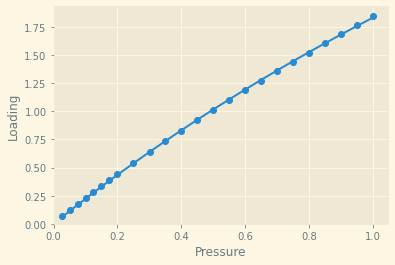

In [3]:
df_CO2 = pd.read_csv("CO2.csv", skiprows=1)
CO2_isotherm = pyiast.ModelIsotherm(df_CO2, loading_key="Loading(mmol/g)", 
                                         pressure_key="P(bar)", model="Langmuir")
CO2_isotherm.print_params()
pyiast.plot_isotherm(CO2_isotherm)

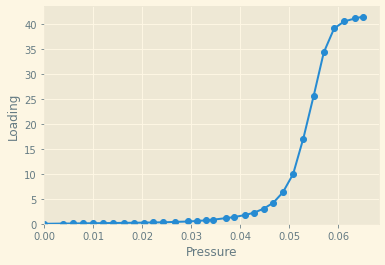

In [4]:
df_H2O = pd.read_csv("H2O.csv", skiprows=1)
H2O_isotherm = pyiast.InterpolatorIsotherm(df_H2O, loading_key="Loading(mmol/g)", 
                                         pressure_key="P(bar)", 
                                      fill_value=df_H2O["Loading(mmol/g)"].max())
pyiast.plot_isotherm(H2O_isotherm)

## binary (CO$_2$/N$_2$ adsorption)

CO$_2$ partial pressure: 166 mbar

N$_2$ partial pressure: 679 mbar

In [5]:
p = np.array([.166, .679]) # mbar
print("total P = ", np.sum(p))
q = pyiast.iast(p, [CO2_isotherm, N2_isotherm])
print(q)

total P =  0.8450000000000001
                      Component 1: p^0 = 1.853660 > 1.000360, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
[0.35965481 0.20789476]


## ternary (CO$_2$/N$_2$/H$_2$O adsorption)

CO$_2$ partial pressure: 166 mbar

N$_2$ partial pressure: 679 mbar

H$_2$O partial pressure: 0.02 mbar

In [6]:
p3 = np.array([.166, .679, .02]) # mbar 
print("total P = ", np.sum(p3))
q3 = pyiast.iast(p3, [CO2_isotherm, N2_isotherm, H2O_isotherm], verboseflag=True)
q3

total P =  0.8650000000000001
3 components.
	Partial pressure component 0 = 0.166000
	Partial pressure component 1 = 0.679000
	Partial pressure component 2 = 0.020000
Component  0
	p =  0.166
	p^0 =  0.46422908896762305
	Loading:  0.5145121362537167
	x =  0.35758207304320266
	Spreading pressure =  1.002420596578517
Component  1
	p =  0.679
	p^0 =  3.210077404661173
	Loading:  0.30435059496607747
	x =  0.21152137920850828
	Spreading pressure =  1.0024205965785162
Component  2
	p =  0.02
	p^0 =  0.046414853181147145
	Loading:  0.6200017282732687
	x =  0.4308965477482891
	Spreading pressure =  1.0024205965785138
                      Component 1: p^0 = 3.210077 > 1.000360, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.


array([0.51451214, 0.30435059, 0.62000173])

## compare to experiment

see Fig. 6 in Mason et al.

In [7]:
p_mix = np.array([.16562, .67912])
q_mix = np.array([.34, .27])
yerr = np.array([.1, .14])

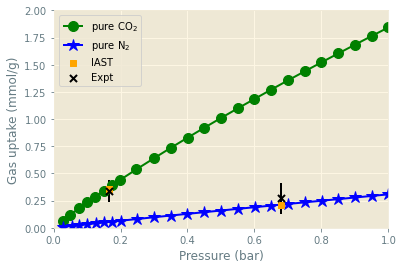

In [8]:
fig = plt.figure(facecolor='w')
plt.plot(df_CO2['P(bar)'], df_CO2['Loading(mmol/g)'], marker='o', color='g', label='pure CO$_2$', markersize=10)
plt.plot(df_N2['P(bar)'], df_N2['Loading(mmol/g)'], marker='*', color='b', label='pure N$_2$', markersize=12)
plt.xlabel("Pressure (bar)")
# plt.scatter(p3[:-1], q3[:-1], color='orange', marker='s',s=50,zorder=110, label='IAST')
plt.scatter(p, q, color='orange', marker='s',s=45,zorder=110, label='IAST')
plt.scatter(p_mix, q_mix, marker='x', zorder=200, color='k', s=50, label='Expt')
plt.errorbar(p_mix, q_mix,color='k', yerr=yerr, linestyle='none', markersize=50)
plt.xlim([0, 1.0])
plt.ylim([0, 2.0])
plt.ylabel("Gas uptake (mmol/g)")
plt.legend(loc='upper left')
plt.savefig('JaradMason.pdf', format='pdf',  facecolor=fig.get_facecolor())

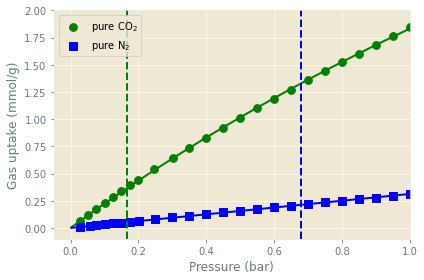

In [9]:
fig = plt.figure(facecolor='w')
p_plot = np.linspace(0, 1)
plt.scatter(df_CO2['P(bar)'], df_CO2['Loading(mmol/g)'], 
            marker='o', color='g', label='pure CO$_2$', s=60)
plt.plot(p_plot, CO2_isotherm.loading(p_plot), color='g')
plt.scatter(df_N2['P(bar)'], df_N2['Loading(mmol/g)'], 
            marker='s', color='b', label='pure N$_2$', s=60)
plt.plot(p_plot, N2_isotherm.loading(p_plot), color='b')
plt.xlabel("Pressure (bar)")
plt.axvline(x=0.679, linewidth=2, color='b', linestyle='--')
plt.axvline(x=0.166, linewidth=2, color='g', linestyle='--')
# plt.scatter(p3[:-1], q3[:-1], color='orange', marker='s',s=45,zorder=110, label='IAST')
# plt.scatter(p, q, color='orange', marker='s',s=45,zorder=110, label='IAST')
# plt.scatter(p_mix, q_mix, marker='x', zorder=200, color='k', s=56, label='Expt')
# plt.errorbar(p_mix, q_mix,color='k', yerr=yerr, linestyle='none')
plt.xlim([-.05, 1.0])
plt.ylim([-.1, 2.0])
plt.ylabel("Gas uptake (mmol/g)")
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('JaradMason_N2_and_CO2.pdf', format='pdf', facecolor=fig.get_facecolor())

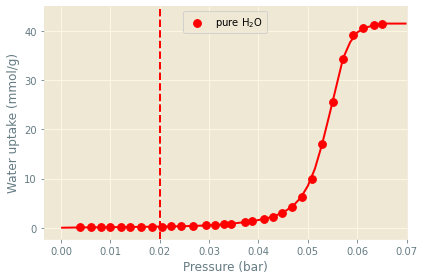

In [10]:
fig = plt.figure(facecolor='w')
plt.scatter(df_H2O['P(bar)'], df_H2O['Loading(mmol/g)'], marker='o', 
         color='r', label='pure H$_2$O', s=60)
plt.plot(np.linspace(0, .07), H2O_isotherm.loading(np.linspace(0, 0.07)), color='r')
plt.axvline(x=.02, linewidth=2, color='r', linestyle='--')
plt.xlabel("Pressure (bar)")
plt.xlim([-.05*.07, 0.07])
plt.ylim([-.05*45, 45.])
plt.ylabel("Water uptake (mmol/g)")
plt.legend(loc='upper center')
plt.tight_layout()
plt.savefig('JaradMason_H2O.pdf', format='pdf', facecolor=fig.get_facecolor())

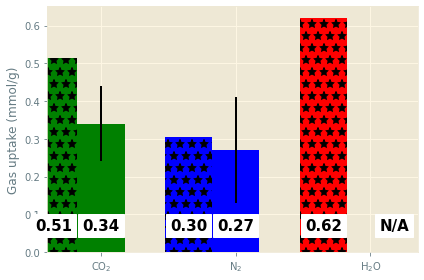

In [11]:
ind = np.arange(3)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(facecolor='w')
rects1 = ax.bar(ind, q3, width, color=['g', 'b', 'r'], hatch='*')
#  rects1 = ax.bar(np.arange(2), q, width, color=['g', 'b'], hatch='//')
rects2 = ax.bar(np.arange(2)+width, q_mix, width, color=['g', 'b', 'r'], yerr=yerr, ecolor='k')

# add some text for labels, title and axes ticks
ax.set_ylabel('Gas uptake (mmol/g)')
# ax.set_title('Sc')
ax.set_xticks(ind+width)
ax.set_xticklabels(('CO$_2$', 'N$_2$', r'H$_2$O') )

#x.legend( (rects1[0], rects2[0]), ('Exp\'t', 'IAST') , loc='upper center')

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        #ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%.2f'% height,
        ax.text(rect.get_x()+rect.get_width()/2., .05, '%.2f'% height,
                ha='center', va='bottom', fontsize=15, weight='bold',
                backgroundcolor='w')
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(2.35+rects1[0].get_width()/2., .05, 'N/A',
                ha='center', va='bottom', 
                fontsize=15, weight='bold',
                backgroundcolor='w')

plt.xlim([-.05,3-width+.05])
autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.savefig('JaradMason_IAST.pdf', format='pdf', facecolor=fig.get_facecolor())
plt.savefig('JaradMason_IAST.png', format='png', facecolor=fig.get_facecolor(), dpi=250)
plt.show()